In [79]:
import pandas as pd

df = pd.read_pickle('property_df.pkl')
df.head()

,Title,City,Area,Size,Rooms,Bedrooms,Bathrooms,Price,Features,Property Type,Condition,Age,Floor,Orientation
0,Apartment for rent in Casablanca Finance City....,Casablanca,Casablanca Finance City,120,3,2,2,"12,500 DH",,Apartment,Good condition,NaN,NaN,NaN
1,Apartment for rent in Casablanca Finance City....,Casablanca,Casablanca Finance City,240,4,3,3,"23,000 DH","Garden, Terrace, Garage, Elevator, Pool, Conci...",Apartment,New,NaN,NaN,NaN
2,Apartment for rent in Casablanca Finance City....,Casablanca,Casablanca Finance City,67,2,None,2,"9,500 DH","Garden, Terrace, Garage, Elevator, Pool, Conci...",Apartment,New,NaN,NaN,NaN
3,Great apartment for rent in Bourgogne Ouest. 4...,Casablanca,Bourgogne Ouest,110,4,2,2,"10,000 DH","Terrace, Garage, Elevator, Concierge, Furnishe...",Apartment,Good condition,5-10 years old,Marble,NaN
4,Apartment for rent in Ain Diab Extension. 4 ro...,Casablanca,Ain Diab Extension,170,4,3,3,"17,000 DH\n\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\...","Garden, Terrace, Garage, Elevator, Sea views, ...",Apartment,New,Less than 1 year,Marble,South


## Cleaning up Data

In [80]:
# Make the column titles uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Strip irrelevant characters and convert price to integer
df.price = df.price.str.replace('[^0-9]', '', regex=True)
df.price.dropna(inplace=True)

df_cleaned = df[df['price'] != '']
df_cleaned['price'] = df_cleaned['price'].astype('int')

df_cleaned.dropna(subset='size', inplace=True)
df_cleaned['size'] = df_cleaned['size'].astype('int')

/var/folders/mh/ffwl3tts46v2t_0rq23dp0c00000gn/T/ipykernel_4096/2813669628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price'] = df_cleaned['price'].astype('int')
/var/folders/mh/ffwl3tts46v2t_0rq23dp0c00000gn/T/ipykernel_4096/2813669628.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset='size', inplace=True)
/var/folders/mh/ffwl3tts46v2t_0rq23dp0c00000gn/T/ipykernel_4096/2813669628.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

df_normalised = df_cleaned[df_cleaned.price < 50000]

In [82]:
df_normalised.dtypes

title            object
city             object
area             object
size              int64
rooms            object
bedrooms         object
bathrooms        object
price             int64
features         object
property_type    object
condition        object
age              object
floor            object
orientation      object
dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Casablanca'),
  Text(1, 0, 'Marrakech'),
  Text(2, 0, 'Rabat'),
  Text(3, 0, 'Tanger'),
  Text(4, 0, 'Agadir'),
  Text(5, 0, 'Fès'),
  Text(6, 0, 'Kénitra'),
  Text(7, 0, 'Mohammédia'),
  Text(8, 0, 'Salé'),
  Text(9, 0, 'Bouskoura'),
  Text(10, 0, 'Temara'),
  Text(11, 0, 'Essaouira'),
  Text(12, 0, 'Meknes')])

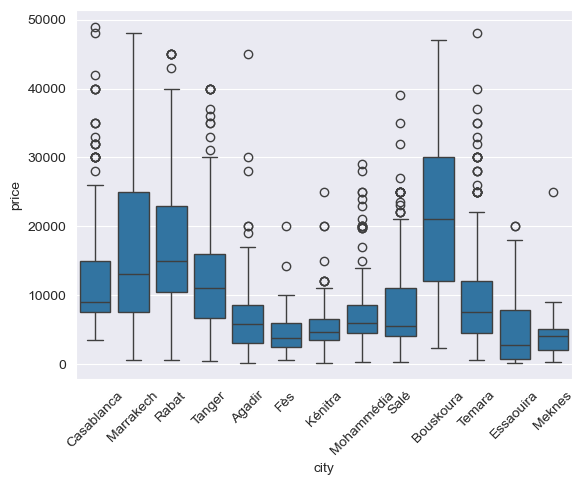

In [83]:
sns.boxplot(data=df_normalised, x='city', y='price')
plt.xticks(rotation=45)


In [84]:
df_normalised = df_normalised[df_normalised.price > 2000]


In [85]:
df_normalised = df_normalised[df_normalised['size']< 140140]

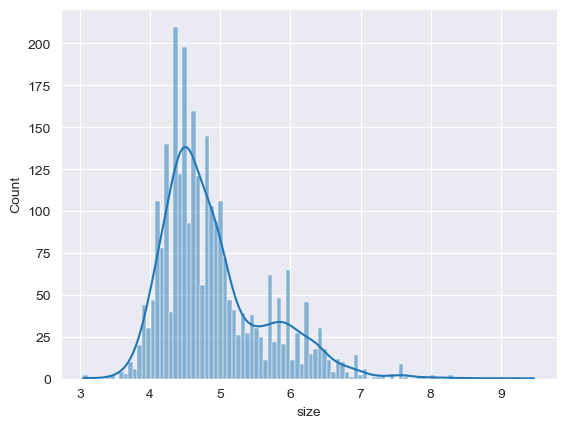

In [86]:
import numpy as np

sns.histplot(np.log1p(df_normalised['size']), bins=100, kde=True)
plt.show()

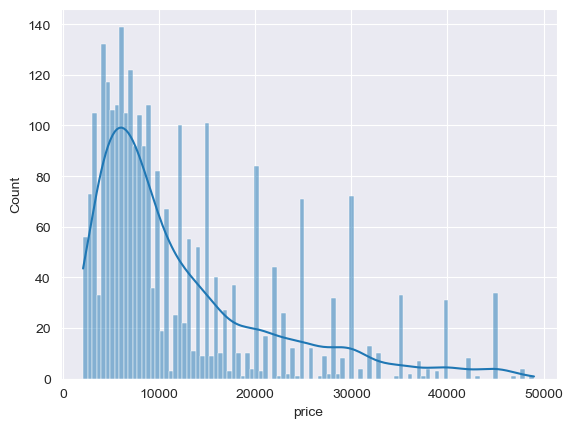

In [87]:
sns.histplot(df_normalised['price'], bins=100, kde=True)
plt.show()

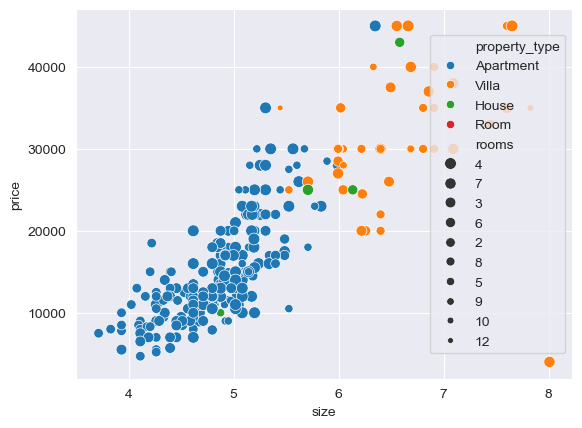

In [88]:
df_normalised['size'] = np.log1p(df_normalised['size'])
df_normalised['price'] = df_normalised['price']
sns.scatterplot(x='size', y='price', data=df_normalised[df_normalised['city']=='Rabat'], size='rooms', hue='property_type')
plt.show()


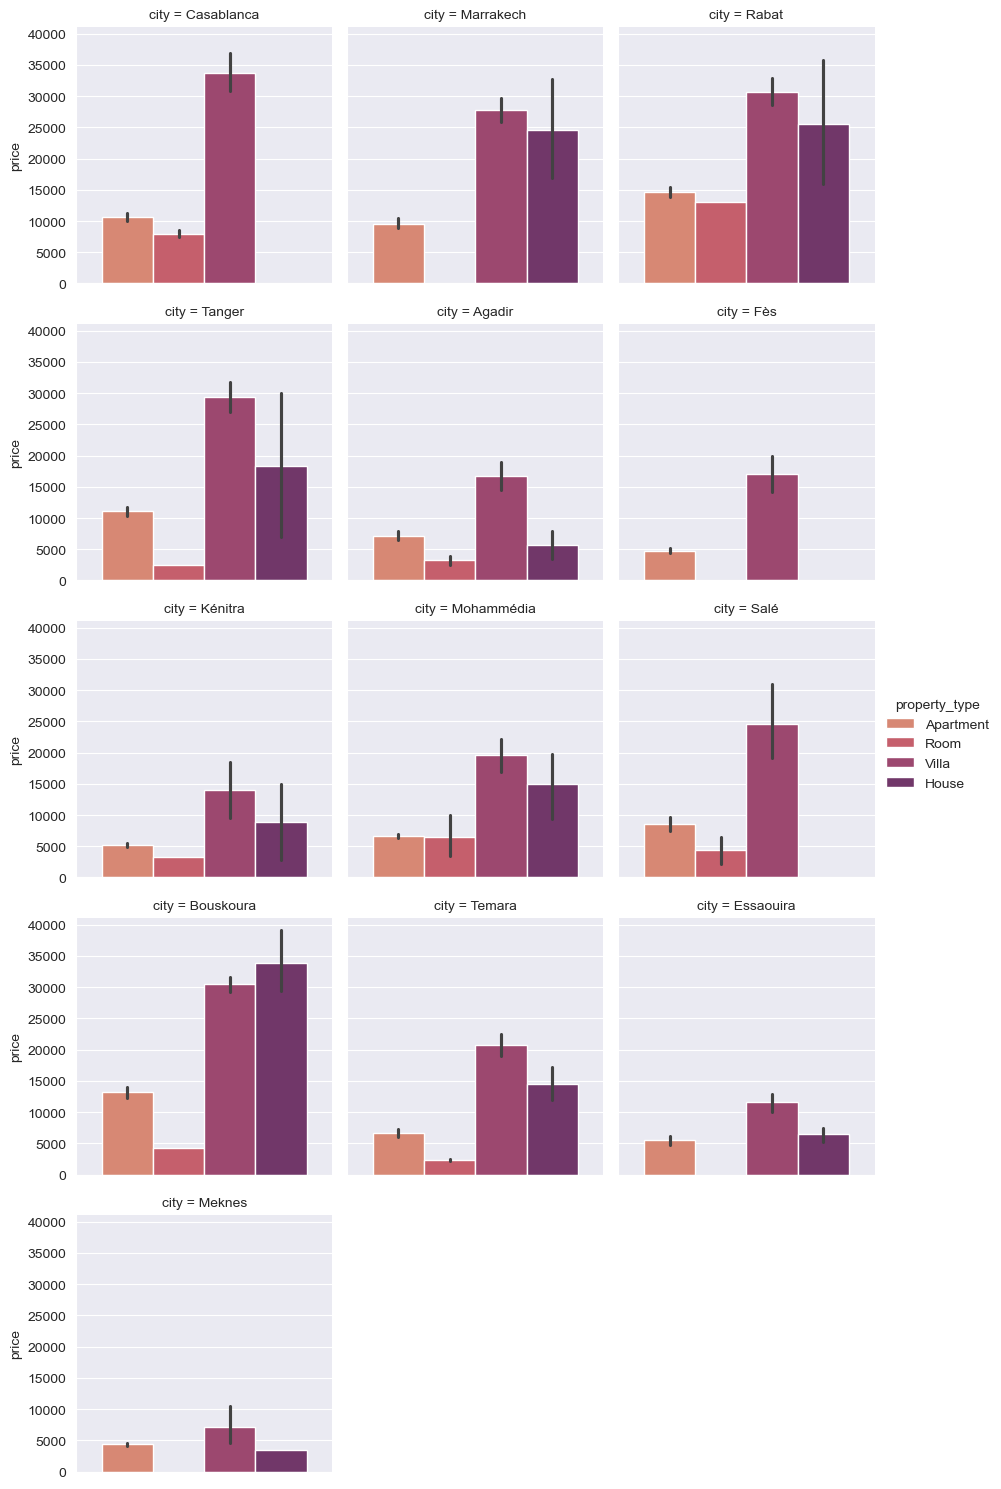

In [89]:
sns.set_style('darkgrid')
sns.catplot(y='price', data=df_normalised, kind='bar', col='city', hue='property_type', palette='flare', col_wrap=3, height=3)
plt.show()

In [90]:
no_rooms = df_normalised[df_normalised['rooms'].isna()]
no_rooms[no_rooms['title'].str.contains('room|rooms')]['title']

import re
    
def extract_rooms(description):
    pattern = r'(\d+)\s*(?:\w+\s)?rooms?\b'
    match = re.search(pattern, description, re.IGNORECASE)
    if match:
        return match.group(1)
    return None

In [91]:
no_rooms

,title,city,area,size,rooms,bedrooms,bathrooms,price,features,property_type,condition,age,floor,orientation
18,Room for rent in Almaz. 1 Room. Terrace and lift.,Casablanca,Almaz,4.875197,None,None,2,7500,"Terrace, Elevator, Pool",Room,Good condition,2nd,NaN,NaN
19,Flat for rent in Bourgogne Est. 1 lovely room.,Casablanca,Bourgogne Est,3.663562,None,None,None,6000,,Apartment,Good condition,NaN,NaN,NaN
20,Great apartment for rent in Roches Noires. Tot...,Casablanca,Roches Noires,3.828641,None,None,None,4250,,Apartment,Good condition,NaN,NaN,NaN
24,Very nice apartment for rent in Plateau (Al Ba...,Casablanca,Plateau (Al Batha),3.761200,None,None,None,6000,"Garage, Elevator, Concierge, Furnished, Exteri...",Apartment,New,Less than 1 year,Marble,South
57,Appartement à louer par le propriétaire,Casablanca,Ferme Bretonne (Hay Arraha),4.663439,None,2,2,11500,"Terrace, Garage, Elevator, Concierge, Furnishe...",Apartment,New,Less than 1 year,Marble,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,High quality villa for rent. Surface area 300 ...,Temara,Temara plage,5.707110,None,4,2,33000,"Garden, Terrace, Garage, Elevator, Pool, Moroc...",Villa,NaN,NaN,NaN,NaN
3168,Rent this apartment in Massira 2. 2 beautiful ...,Temara,Massira 2,4.394449,None,2,None,3000,,Apartment,Good condition,1st,NaN,NaN
3247,Apartment for rent in Centre ville. Large area...,Essaouira,Centre ville,3.931826,None,None,None,4000,"Terrace, Furnished, Moroccan lounge, Satellite...",Apartment,New,5-10 years old,2nd,South
3281,Rent this apartment in Centre ville. 1 Room. P...,Essaouira,Centre ville,4.219508,None,None,2,7000,"Garden, Terrace, Garage, Elevator, Concierge, ...",Apartment,Good condition,5-10 years old,1st,North


In [92]:
for index, row in df_normalised.iterrows():
    if pd.isna(row['rooms']):
        df_normalised.loc[index, 'rooms'] = extract_rooms(row['title'])

In [93]:
df_normalised[df_normalised['rooms'].isna()]

,title,city,area,size,rooms,bedrooms,bathrooms,price,features,property_type,condition,age,floor,orientation
20,Great apartment for rent in Roches Noires. Tot...,Casablanca,Roches Noires,3.828641,None,None,None,4250,,Apartment,Good condition,NaN,NaN,NaN
24,Very nice apartment for rent in Plateau (Al Ba...,Casablanca,Plateau (Al Batha),3.761200,None,None,None,6000,"Garage, Elevator, Concierge, Furnished, Exteri...",Apartment,New,Less than 1 year,Marble,South
57,Appartement à louer par le propriétaire,Casablanca,Ferme Bretonne (Hay Arraha),4.663439,None,2,2,11500,"Terrace, Garage, Elevator, Concierge, Furnishe...",Apartment,New,Less than 1 year,Marble,West
101,Very nice apartment for rent in Mers Sultan. 1...,Casablanca,Mers Sultan,3.931826,None,None,None,4500,"Terrace, Garage, Elevator, Furnished, Exterior...",Apartment,Good condition,NaN,NaN,NaN
121,Flat for rent in Palmier. 1 Living area.,Casablanca,Palmier,3.931826,None,2,None,5500,,Apartment,Good condition,5-10 years old,2nd,Marble
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,Find an apartment for rent in Wifak. Large are...,Temara,Wifak,4.394449,None,2,None,4200,"Terrace, Garage, Elevator, Concierge, Exterior...",Apartment,Good condition,5-10 years old,Tiled,North
3163,Great apartment for rent in Massira 2. 1 Livin...,Temara,Massira 2,4.110874,None,2,None,4000,Furnished,Apartment,Good condition,NaN,NaN,NaN
3164,High quality villa for rent. Surface area 300 ...,Temara,Temara plage,5.707110,None,4,2,33000,"Garden, Terrace, Garage, Elevator, Pool, Moroc...",Villa,NaN,NaN,NaN,NaN
3247,Apartment for rent in Centre ville. Large area...,Essaouira,Centre ville,3.931826,None,None,None,4000,"Terrace, Furnished, Moroccan lounge, Satellite...",Apartment,New,5-10 years old,2nd,South


In [94]:
df_normalised.isna().sum()

title               0
city                0
area                0
size                0
rooms             134
bedrooms          355
bathrooms         923
price               0
features            0
property_type       0
condition         120
age               676
floor             934
orientation      1391
dtype: int64

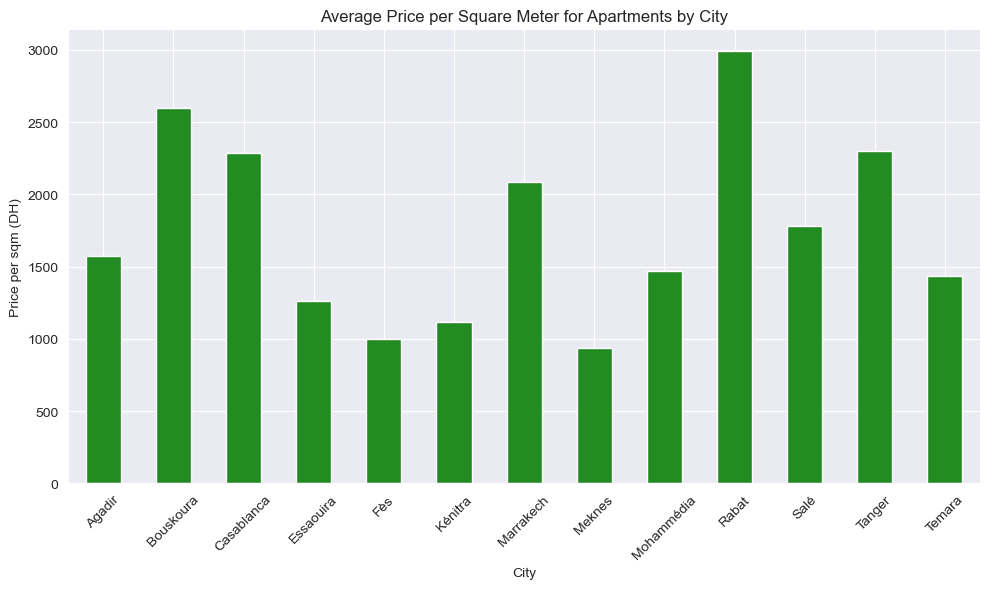

In [95]:

df_normalised['price_sqm'] = df_normalised['price'] / df_normalised['size']

apartments_data = df_normalised[df_normalised['property_type'] == 'Apartment']
price_per_sqm_apartments_by_city = apartments_data.groupby('city')['price_sqm'].mean()

plt.figure(figsize=(10, 6))
price_per_sqm_apartments_by_city.plot(kind='bar', color='forestgreen')
plt.title('Average Price per Square Meter for Apartments by City')
plt.ylabel('Price per sqm (DH)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


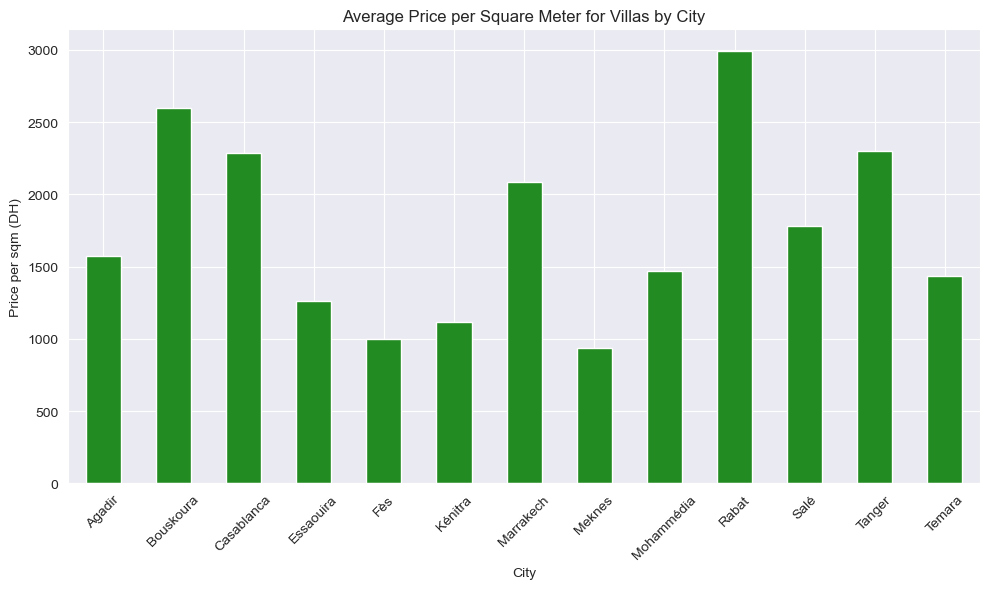

In [111]:
villa_data = df_normalised[df_normalised['property_type'] == 'Villa']
price_per_sqm_villa_by_city = apartments_data.groupby('city')['price_sqm'].mean()

plt.figure(figsize=(10, 6))
price_per_sqm_apartments_by_city.plot(kind='bar', color='forestgreen')
plt.title('Average Price per Square Meter for Villas by City')
plt.ylabel('Price per sqm (DH)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

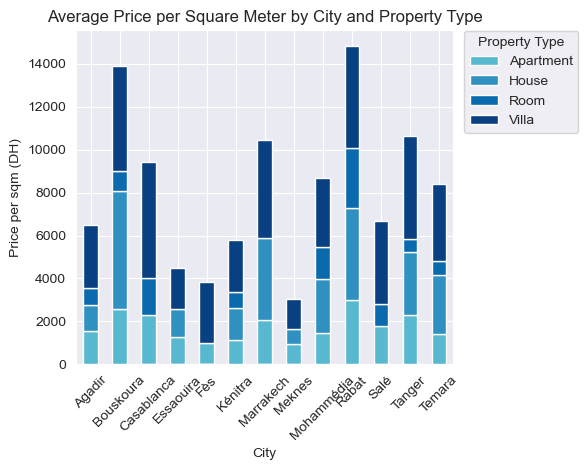

In [160]:
price_per_sqm_by_city_type = df_normalised.groupby(['city', 'property_type'])['price_sqm'].mean().unstack()

colors = plt.cm.GnBu(np.linspace(0.6, 1, 4))

price_per_sqm_by_city_type.plot(kind='bar', stacked=True, color=colors)

# Customize the plot
plt.title('Average Price per Square Meter by City and Property Type')
plt.ylabel('Price per sqm (DH)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Property Type', bbox_to_anchor=(1.35, 1.02), loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()

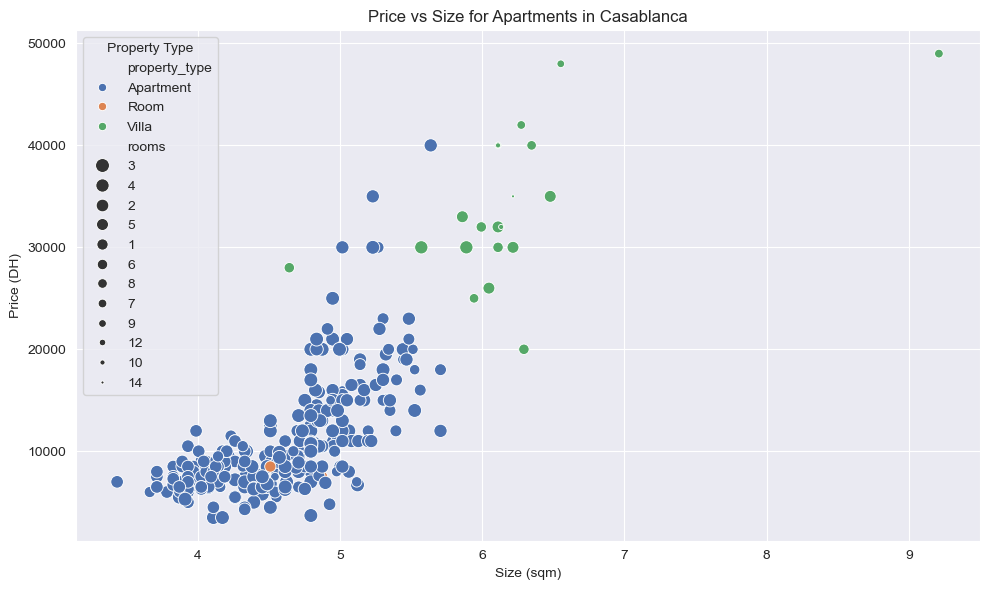

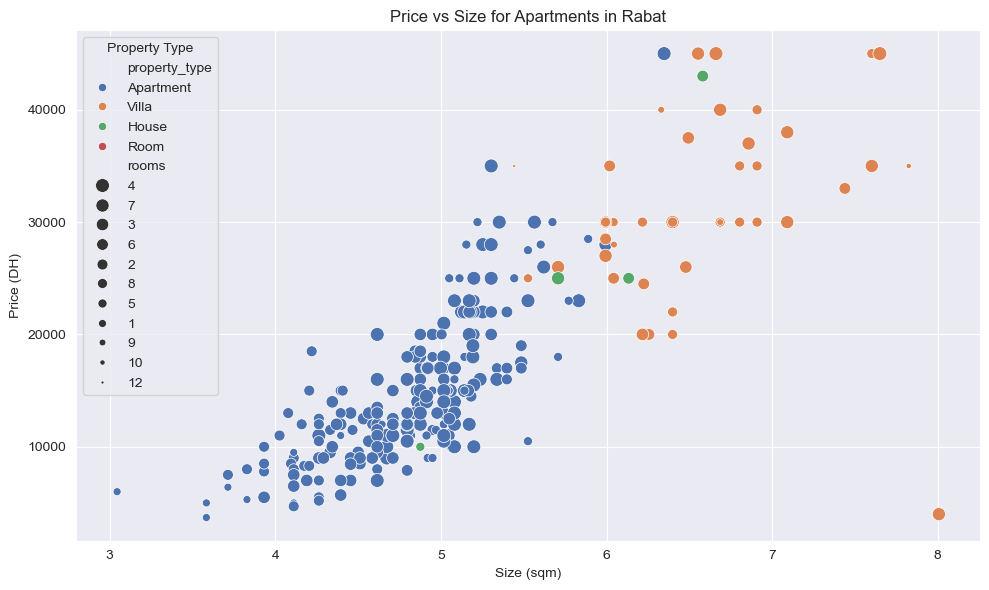

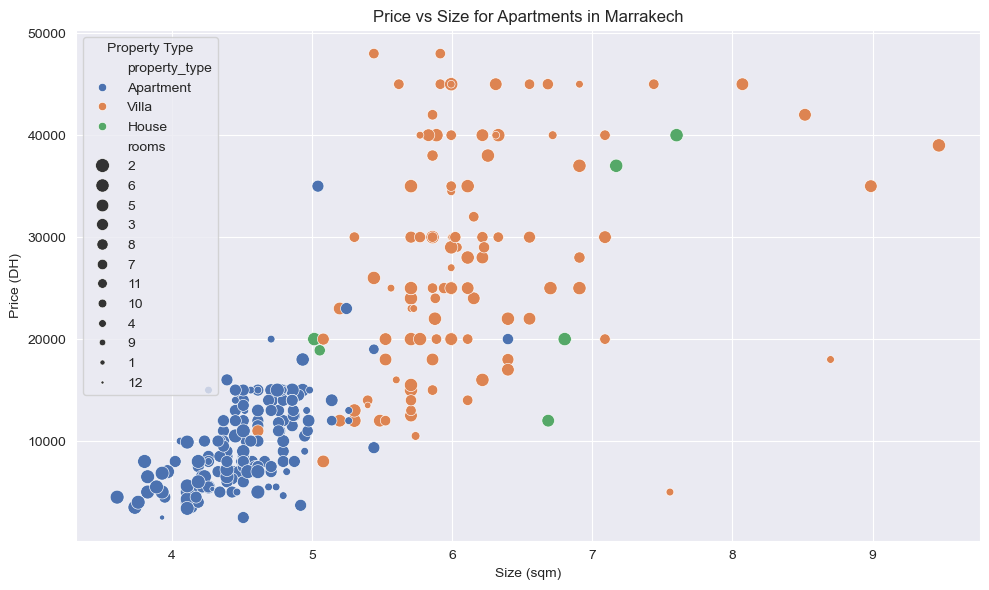

In [105]:
import seaborn as sns

# Prepare the data for plotting
cities = ['Casablanca', 'Rabat', 'Marrakech']

# Create scatter plots for each city
for city in cities:
    plt.figure(figsize=(10, 6))
    city_data = df_normalised[df_normalised['city'] == city]
    
    sns.scatterplot(
        data=city_data, 
        x='size', 
        y='price', 
        hue='property_type', 
        size='rooms', 
        sizes=(5, 100),
        palette='deep',
        legend='brief'
    )
    
    plt.title(f'Price vs Size for Apartments in {city}')
    plt.xlabel('Size (sqm)')
    plt.ylabel('Price (DH)')
    plt.legend(title='Property Type')
    plt.tight_layout()
    plt.show()

/var/folders/mh/ffwl3tts46v2t_0rq23dp0c00000gn/T/ipykernel_4096/3630091761.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rabat_data, x='area', y='price', palette='deep')


Text(0.5, 1.0, 'Price distribution of areas in Rabat')

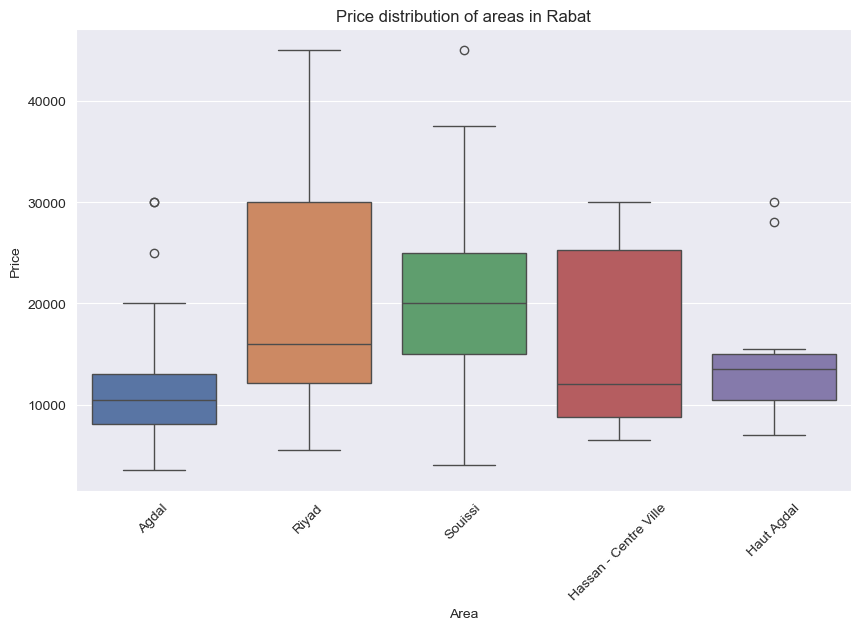

In [110]:
rabat_data = df_normalised[df_normalised['city']=='Rabat']

rabat_data.groupby('area')['price_sqm'].mean().sort_values(ascending=False)
rabat_areas = rabat_data.groupby('area')['price_sqm'].count().sort_values(ascending=False).head(5).index

rabat_data = rabat_data[rabat_data['area'].isin(rabat_areas)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=rabat_data, x='area', y='price', palette='deep')
plt.xticks(rotation=45)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price distribution of areas in Rabat')


In [98]:
casa_data = df_normalised[df_normalised['city']=='Rabat']

casa_data.groupby('area')['price_sqm'].mean().sort_values(ascending=False)
casa_areas = rabat_data.groupby('area')['price_sqm'].count().sort_values(ascending=False).head(5).index

rabat_data = rabat_data[rabat_data['area'].isin(rabat_areas)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=rabat_data, x='area', y='price', palette='deep')
plt.xticks(rotation=45)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price distribution of areas in Rabat')


area
Ain Diab              22
Ain Diab Extension     5
Al Qods                1
Almaz                  1
Anfa                   3
Name: price_sqm, dtype: int64

/var/folders/mh/ffwl3tts46v2t_0rq23dp0c00000gn/T/ipykernel_4096/3199515557.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=marrakech_data, x='area', y='price', palette='deep')


Text(0.5, 1.0, 'Price distribution of areas in Marrakech')

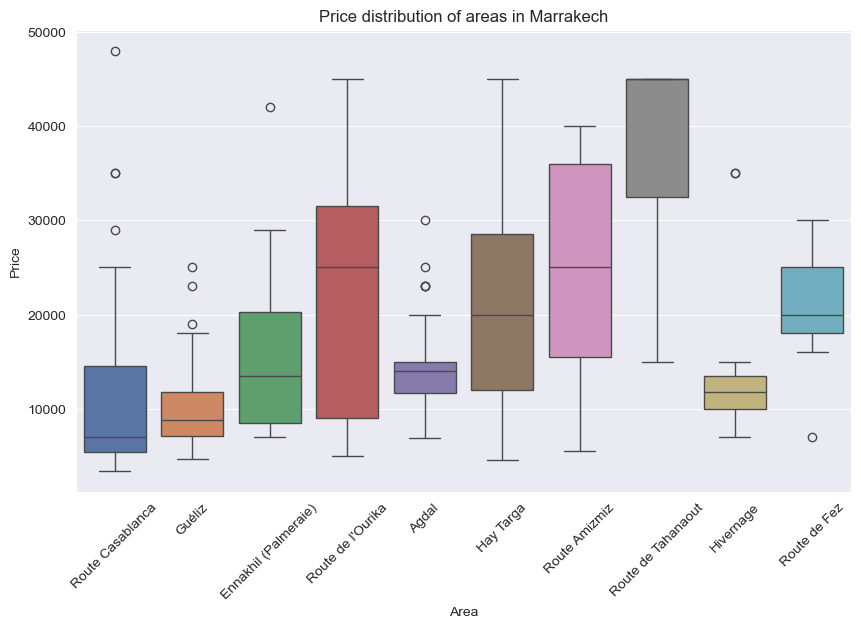

In [104]:
marrakech_data = df_normalised[df_normalised['city']=='Marrakech']

marrakech_data.groupby('area')['price_sqm'].mean().sort_values(ascending=False)
marrakech_areas = marrakech_data.groupby('area')['price_sqm'].count().sort_values(ascending=False).head(10).index

marrakech_data = marrakech_data[marrakech_data['area'].isin(marrakech_areas)]

plt.figure(figsize=(10,6))
sns.boxplot(data=marrakech_data, x='area', y='price', palette='deep')
plt.xticks(rotation=45)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price distribution of areas in Marrakech')

In [100]:
rabat_data

,title,city,area,size,rooms,bedrooms,bathrooms,price,features,property_type,condition,age,floor,orientation,price_sqm
0,Apartment for rent in Casablanca Finance City....,Casablanca,Casablanca Finance City,4.795791,3,2,2,12500,,Apartment,Good condition,NaN,NaN,NaN,2606.452446
1,Apartment for rent in Casablanca Finance City....,Casablanca,Casablanca Finance City,5.484797,4,3,3,23000,"Garden, Terrace, Garage, Elevator, Pool, Conci...",Apartment,New,NaN,NaN,NaN,4193.409579
2,Apartment for rent in Casablanca Finance City....,Casablanca,Casablanca Finance City,4.219508,2,None,2,9500,"Garden, Terrace, Garage, Elevator, Pool, Conci...",Apartment,New,NaN,NaN,NaN,2251.447482
3,Great apartment for rent in Bourgogne Ouest. 4...,Casablanca,Bourgogne Ouest,4.709530,4,2,2,10000,"Terrace, Garage, Elevator, Concierge, Furnishe...",Apartment,Good condition,5-10 years old,Marble,NaN,2123.354044
5,Very nice apartment for rent in Californie. 2 ...,Casablanca,Californie,4.795791,3,2,2,12000,"Garden, Terrace, Garage, Elevator, Pool, Conci...",Apartment,New,Less than 1 year,1st,Marble,2502.194349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Rent this apartment in Ain Diab. Small area 56...,Casablanca,Ain Diab,4.043051,2,None,None,9000,"Garden, Garage, Elevator, Security system, Int...",Apartment,Good condition,5-10 years old,Marble,NaN,2226.041523
326,Lovely apartment for rent in Ain Diab. 4 comfo...,Casablanca,Ain Diab,5.351858,4,3,2,15000,"Garden, Terrace, Garage, Elevator, Pool, Conci...",Apartment,Good condition,5-10 years old,3rd,Marble,2802.764876
327,Very nice apartment for rent in Ain Diab. 3 ro...,Casablanca,Ain Diab,5.303305,4,3,2,17000,"Terrace, Garage, Elevator, Concierge, Furnishe...",Apartment,Good condition,5-10 years old,3rd,Marble,3205.548294
328,Apartment for rent in Bourgogne Ouest. 1 lovel...,Casablanca,Bourgogne Ouest,3.912023,3,None,None,5300,"Garage, Elevator, Sea views, Concierge, Box ro...",Apartment,Good condition,1-5 years old,Marble,South,1354.797759
